In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def mesh_grid(x_start, x_end, y_start, y_end, N, grid_properties=False, plotting=False, width=10.0):
    '''
    Generate 2D mesh grid.
    - used by other flow functions.
    
    Parameters:
    -------------------
    x_start, x_end : float, boundaries in the x-direction
    y_start, y_end : float, boundaries in the y-direction
    N : int, number of points in each direction
    grid_properties : bool, if True retruns mesh properties, 
                    x_start,x_end,y_start,y_end,X,Y
    plotting : bool, plot the meshgrid, default is False
    width : float, width of the plot, default is 10.0
    
    Returns:
    --------------
    gridpoints : if True
    mesh_plot : if True 
    None
    '''
    
    x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
    y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates
    
    X, Y = np.meshgrid(x, y)              # generates a mesh grid
    
    if plotting:
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.scatter(X, Y, s=5, color='#CD2305', marker='o')
    
    if grid_properties:
        return (x_start, x_end, y_start, y_end, X, Y)
    return None

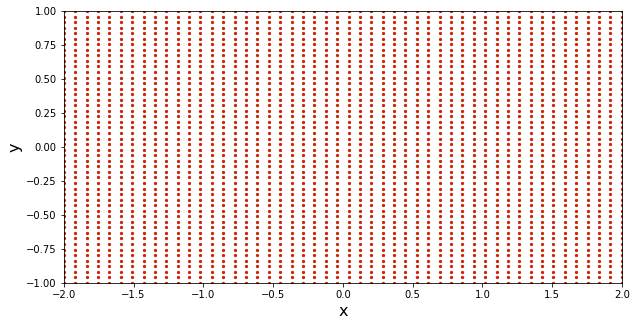

In [3]:
mesh_grid(-2.0,2.0,-1.0,1.0,50,plotting=True)

In [4]:
def sourceFlow(x_source, y_source, source_strength, velocities_output=True, plotting=True, width=10):
    '''
    Source Flow function.
    - A source is a point from which we imagine that fluid is flowing out, 
      uniformly. Thus, all the streamlines radiate from a single point as 
      straight lines and the radial velocity decreases with the distance 
      from the source point.
      
      - uses meshgrid Function to generate 2D grid
      
    Parameters:
    ----------------
    x_source : float, x-coordinate of source,
                must in inside the boundaries of meshgrid
    y_source : float, y-coordiante of source,
                must in inside the boundaries of meshgrid
    source_strength : positive float, strength of the source
    velocities_output : bool, if True, retruns the x and y velocites 
                        of source flow on meshgrid
    plotting : bool, plot the sourceflow velocity  field, default is True
    width : float, width of the plot, default is 10.0
    
    Returns:
    --------------
    velocities_output : if True
    velocityField_plot : if True 
    None
    '''
    
    # meshgrid properties
    x_start,x_end,y_start,y_end,X,Y = mesh_grid(-10.0,10.0,-5.0,5.0,100,grid_properties=True)
    
    # compute the velocity field of source flow on the mesh grid
    u_source = (source_strength / (2 * math.pi) *
                (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
    v_source = (source_strength / (2 * math.pi) *
                (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))
    
    if plotting:
        # plot the streamlines
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.streamplot(X, Y, u_source, v_source,
                          density=2, linewidth=1, arrowsize=2, arrowstyle='->')
        plt.scatter(x_source, y_source,
                       color='#CD2305', s=80, marker='o')
    
    if velocities_output:
        return u_source, v_source
    return None

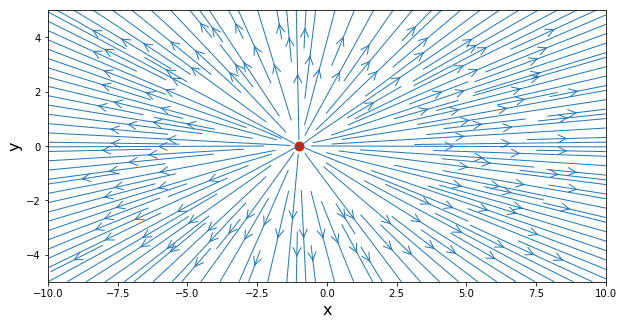

In [5]:
sourceFlow(-1.0, 0.0, 5.0, velocities_output=False)

In [6]:
def sinkFlow(x_sink, y_sink, sink_strength, velocities_output=True, plotting=True, width=10):
    '''
    Sink Flow function.
    - In the source flow, the strength was chosen to be positive. 
      a source with a negative strength is called a sink. Instead of 
      radiating from a single point, the straight streamlines are now 
      converging to a single point.
    - The velocity field corresponding to a sink looks similar to that 
      of a source, except for the direction of the flow.
      
    - uses meshgrid Function to generate 2D grid
      
    Parameters:
    ----------------
    x_sink : float, x-coordinate of sink,
                must in inside the boundaries of meshgrid
    y_sink : float, y-coordiante of sink,
                must in inside the boundaries of meshgrid
    sink_strength : negative float, strength of the sink
    velocities_output : bool, if True, retruns the x and y velocites 
                        of sink flow on meshgrid
    plotting : bool, plot the sinkflow velocity field, default is True
    width : float, width of the plot, default is 10.0
    
    Returns:
    --------------
    velocities_output : if True
    velocityField_plot : if True 
    None
    '''
    
    # meshgrid properties
    x_start,x_end,y_start,y_end,X,Y = mesh_grid(-10.0,10.0,-5.0,5.0,100,grid_properties=True)
    
    # compute the velocity field of sink flow on the mesh grid
    u_sink = (sink_strength / (2 * math.pi) *
                (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
    v_sink = (sink_strength / (2 * math.pi) *
                (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
    
    if plotting:
        # plot the streamlines
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.streamplot(X, Y, u_sink, v_sink,
                          density=2, linewidth=1, arrowsize=2, arrowstyle='->')
        plt.scatter(x_sink, y_sink,
                       color='#CD2305', s=80, marker='o')
    
    if velocities_output:
        return u_sink, v_sink
    return None

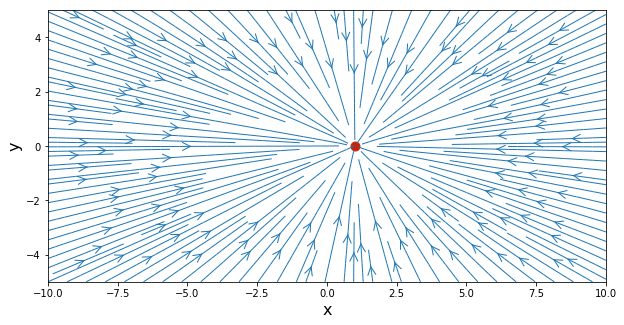

In [7]:
sinkFlow(1.0, 0.0, -5.0, velocities_output=False)

In [8]:
def source_sink_pair(x_source, y_source, x_sink, y_sink, sourceSinkStrength, velocities_output=False, plotting=True, width=10.0):
    '''
    Source-Sink Pair Function
    - adding source and sink by superpositon.
    
    - uses sourceFlow, sinkFlow and meshgrid Functions
    
    Parameters:
    ----------------
    x_source : float, x-coordinate of source,
                must in inside the boundaries of meshgrid
    y_source : float, y-coordiante of source,
                must in inside the boundaries of meshgrid
    x_sink : float, x-coordinate of sink,
                must in inside the boundaries of meshgrid
    y_sink : float, y-coordiante of sink,
                must in inside the boundaries of meshgrid
    sourceSinkStrength : float, strength of the source and sink
                        +ve for source, -ve for sink.
    velocities_output : bool, if True, retruns the x and y velocites 
                        of source-sink pair on meshgrid
    plotting : bool, plot the source-sink flow velocity field, default is True
    width : float, width of the plot, default is 10.0
    
    Returns:
    --------------
    velocities_output : if True
    velocityField_plot : if True 
    None
    '''
    
    # meshgrid properties
    x_start,x_end,y_start,y_end,X,Y = mesh_grid(-10.0,10.0,-5.0,5.0,100,grid_properties=True)
    
    # getting source and sink velocities
    u_source,v_source = sourceFlow(x_source,y_source,sourceSinkStrength,plotting=False)
    u_sink,v_sink = sourceFlow(x_sink,y_sink,-sourceSinkStrength,plotting=False)
    
    # compute the velocity of the pair source/sink by superposition
    u_pair = u_source + u_sink
    v_pair = v_source + v_sink
    
    if plotting:
        # plot the streamlines of the pair source/sink
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.streamplot(X, Y, u_pair, v_pair,
                          density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
        plt.scatter([x_source, x_sink], [y_source, y_sink], 
                       color='#CD2305', s=80, marker='o')
        
    
    if velocities_output:
        return u_pair, v_pair
    return None

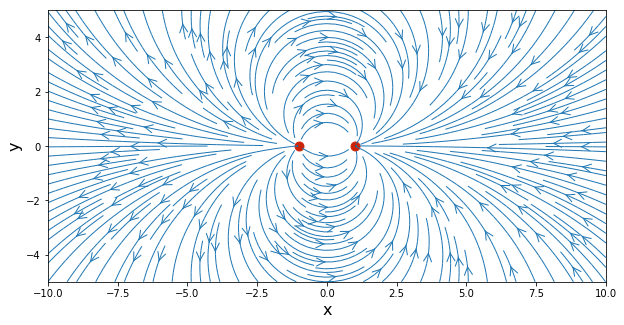

In [9]:
source_sink_pair(-1.0,0.0,1.0,0.0,5.0)

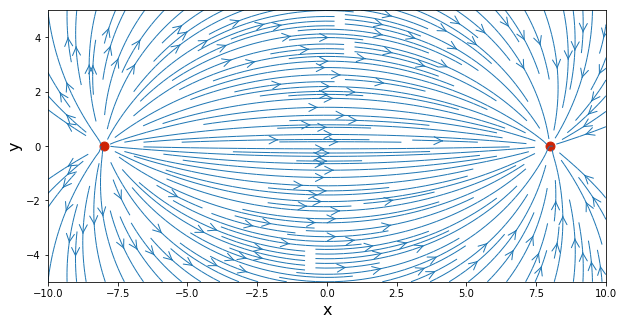

In [10]:
source_sink_pair(-8,0,8,0,5) # changing location

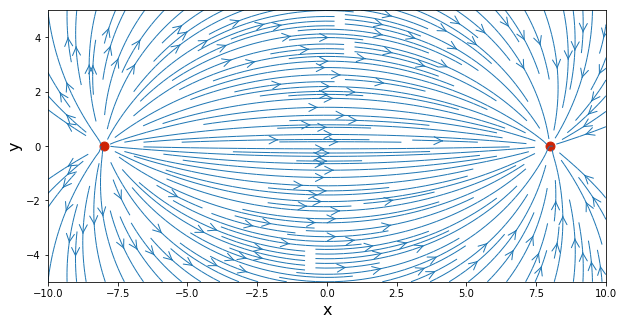

In [11]:
source_sink_pair(-8,0,8,0,20) # changing strength

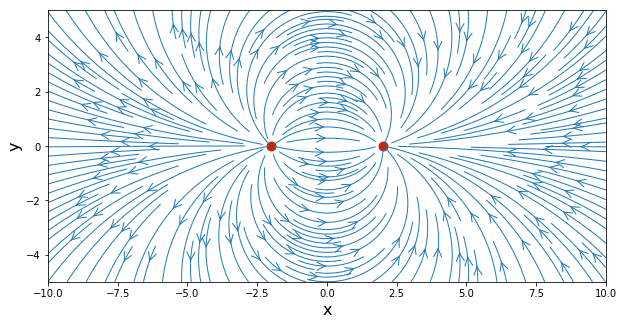

In [12]:
source_sink_pair(-2,0,2,0,5)

In [13]:
# what if Source and Sink Starts at the same point ??

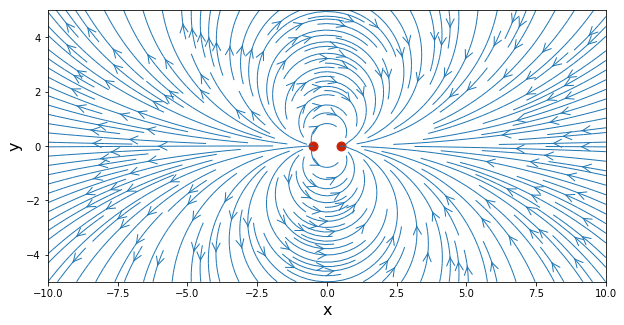

In [14]:
source_sink_pair(-0.5,0.0,0.5,0.0,5)

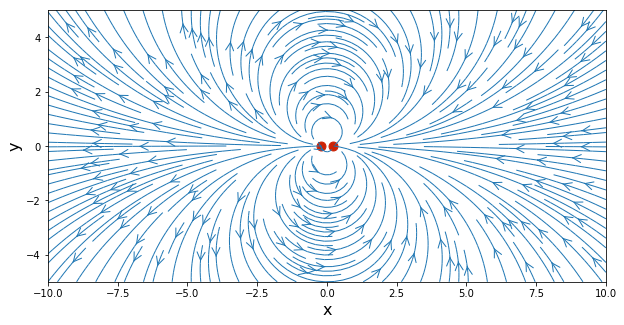

In [15]:
source_sink_pair(-0.2,0.0,0.2,0.0,5)

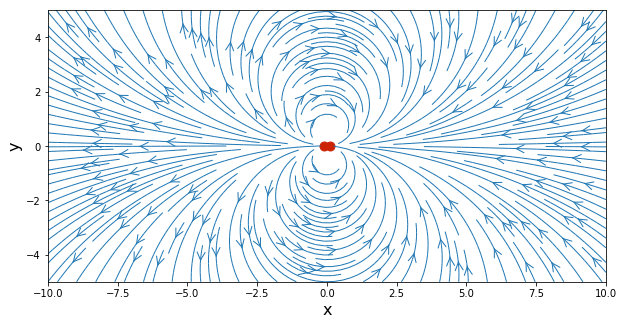

In [16]:
source_sink_pair(-0.1,0.0,0.1,0.0,5)

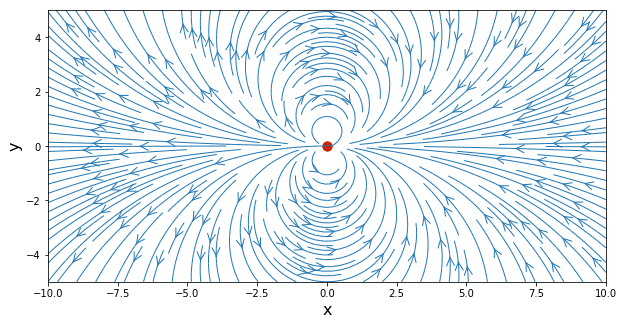

In [17]:
source_sink_pair(-0.01,0.0,0.01,0.0,5)  # very close to being doublet flow but has a samll distance of 0.2 between them

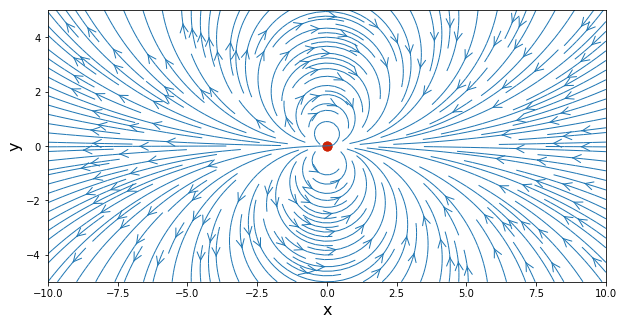

In [18]:
source_sink_pair(-0.0001,0.0,0.0001,0.0,5)

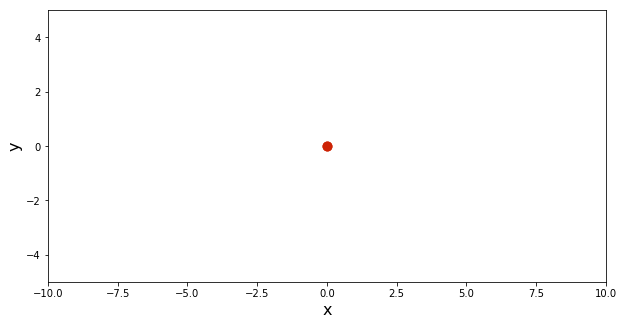

In [19]:
source_sink_pair(-0.0,0.0,0.0,0.0,5)   ## ????